In [2]:
import pandas as pd
from darts import TimeSeries

1. Load the data into a DataFrame.
2. Convert the date columns from string to datetime objects.
3. If needed, reshape the DataFrame for easier analysis (e.g., wide to long format).
4. Perform any specific operations like filtering, grouping, or aggregating based on materials or dates.

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('practise_data_with_ABN_till_dec.csv')

data_long = pd.melt(data, id_vars=['MaterialNumber'], var_name='Date', value_name='Value')
data_long['Date'] = pd.to_datetime(data_long['Date'], format='%d-%m-%Y')
data_long.set_index('Date', inplace=True)

data_long


,MaterialNumber,Value
Date,,
2015-01-04,AB,0
2015-01-04,ABC,0
2015-01-04,ABCD,0
2015-01-04,ABCDE,0
2015-01-04,ABCDEF,0
...,...,...
2022-01-12,ABCDEFGHIJK,289
2022-01-12,ABCDEFGHIJKL,30
2022-01-12,ABCDEFGHIJKLM,78


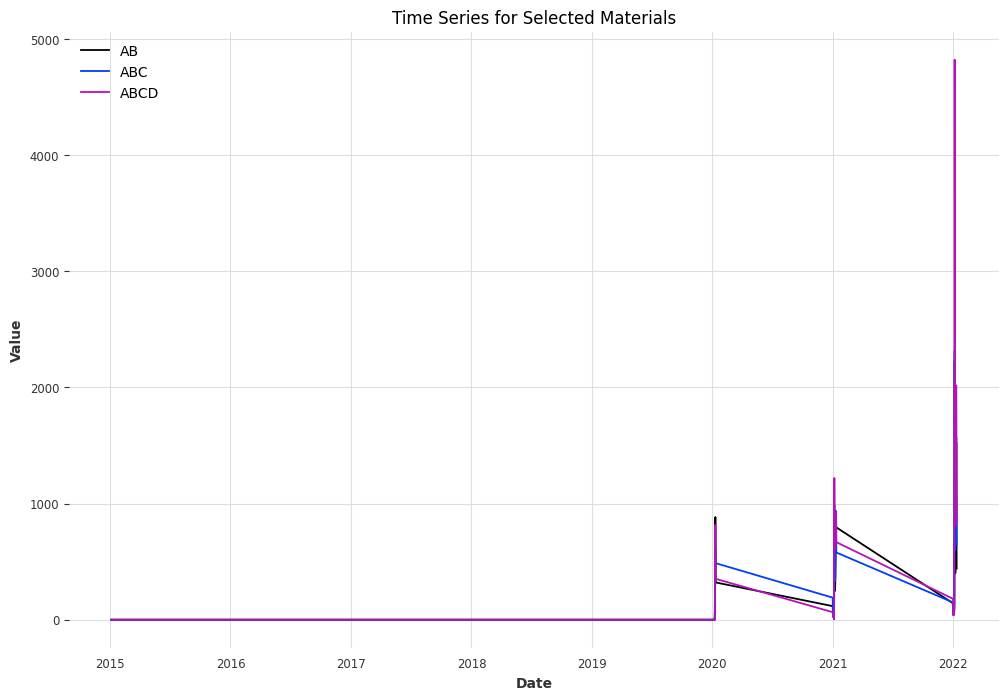

In [4]:
import matplotlib.pyplot as plt

# Select a few materials for plotting
selected_materials = data_long['MaterialNumber'].unique()[:3]

plt.figure(figsize=(12, 8))
for material in selected_materials:
    material_data = data_long[data_long['MaterialNumber'] == material]['Value']
    plt.plot(material_data, label=material)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series for Selected Materials')
plt.legend()
plt.show()


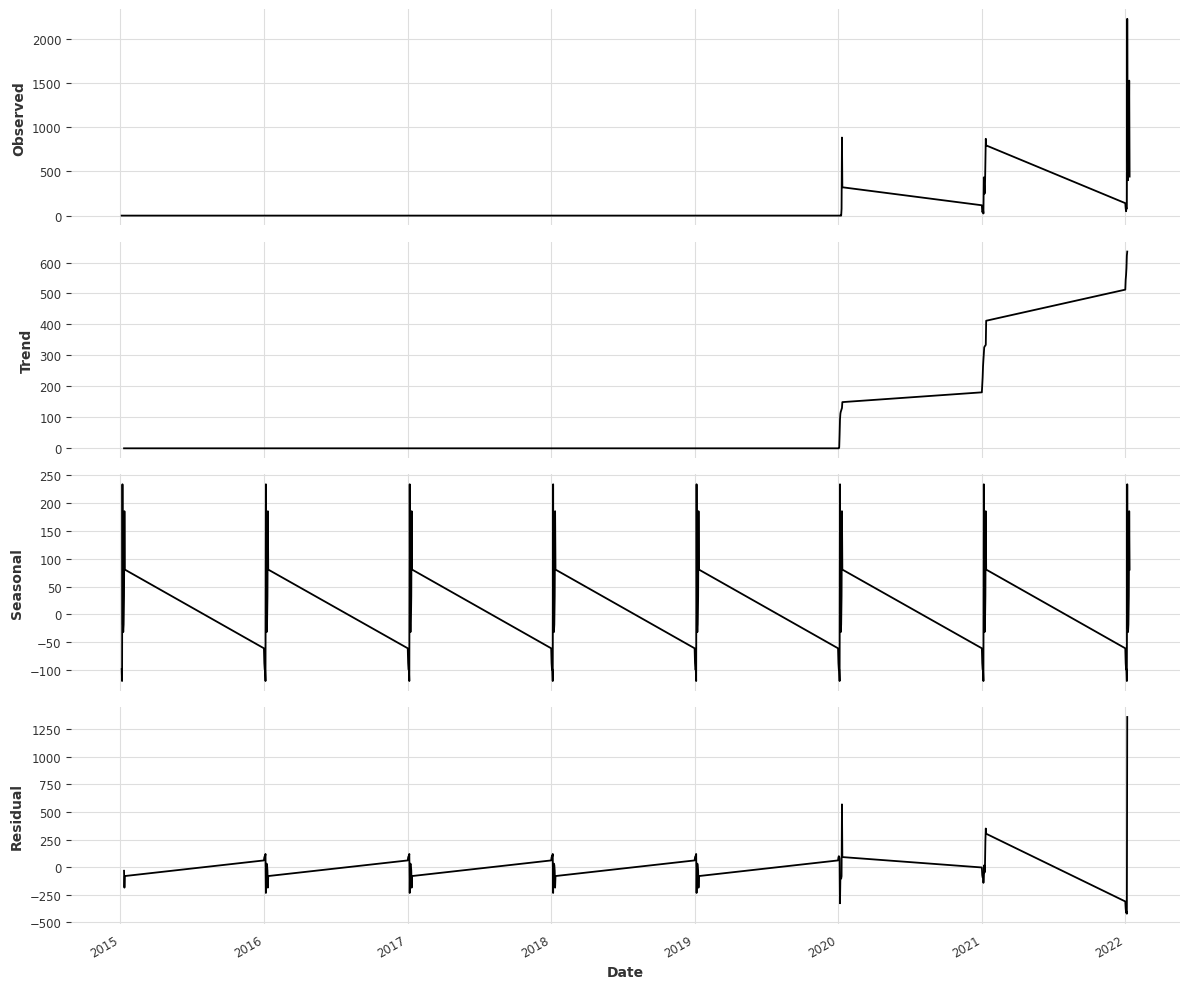

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select one material for decomposition
material = selected_materials[0]
material_data = data_long[data_long['MaterialNumber'] == material]['Value']

# Perform seasonal decomposition
decomposition = seasonal_decompose(material_data, model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')# If 'material_data' has missing dates, you might need to resample and fill missing values
# material_data = material_data.resample('M').mean() # Example of resampling and filling with mean
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
from darts import TimeSeries

filtered_data = data_long[data_long['MaterialNumber'] == material]
filtered_data.columns = ['date', 'counts']
filtered_data
filtered_data = filtered_data.reset_index()
filtered_data = filtered_data.drop(columns=['level_1'], errors='ignore')  # Replace 'level_1' with the actual name if it's known
filtered_data.columns = ['date', 'material', 'counts']  # Adjust if your DataFrame has different columns

filtered_data["date"] = pd.to_datetime(filtered_data["date"])
filtered_data

,date,material,counts
0,2015-01-04,AB,0
1,2015-01-05,AB,0
2,2015-01-06,AB,0
3,2015-01-07,AB,0
4,2015-01-08,AB,0
...,...,...,...
88,2022-01-08,AB,401
89,2022-01-09,AB,559
90,2022-01-10,AB,911
91,2022-01-11,AB,1529


In [26]:
import pandas as pd

# Ensure 'date' column is in datetime format
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

# Set 'date' as the DataFrame index
filtered_data.set_index('date', inplace=True)

# Create a complete date range for your dataset
start_date = filtered_data.index.min()
end_date = filtered_data.index.max()
complete_date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Reindex the DataFrame to ensure it includes all dates in the range, filling missing values with NaN
filtered_data_complete = filtered_data.reindex(complete_date_range)

# Optionally, interpolate missing 'counts' values
# filtered_data_complete['counts'] = filtered_data_complete['counts'].interpolate()

# Now, create the TimeSeries object without specifying 'fill_missing_dates'
series = TimeSeries.from_dataframe(filtered_data_complete.reset_index(), 'index', 'counts', freq='M')

In [27]:
from darts.models import ExponentialSmoothing

train, val = series.split_before(pd.Timestamp('19580101'))

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

ValueError: Timestamp must be between 2015-01-31 00:00:00 and 2021-12-31 00:00:00


ValueError: Timestamp must be between 2015-01-31 00:00:00 and 2021-12-31 00:00:00